# Top Valorant Players
**Author: Ethan Tran (ethankt1@uci.edu)** \
  Course Project\
  UC Irvine\
  Math 10 | Spring 2024\
  I would like to post my notebook on the course's website. [Yes]

# Introduction
This is a dataset of the highest-ranking players from Riot Games', Valorant. The game features a 5v5 objective-based matches where the mechanics include an economy system for purchasing various weapons (emphasizing precise gameplay) and strategic planning. The goal of this analysis is to show if there are any relationships in the data visually amongst the top players in the world.

# Import libraries

In [18]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Load Data

In [19]:
df = pd.read_csv("val_stats.csv")
df

/var/folders/_h/2nwpq18d7c13g7t5z53xhw6r0000gn/T/ipykernel_77938/3110898118.py:1: DtypeWarning: Columns (0,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("val_stats.csv")


,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
0,NaN,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,...,Phantom,33,62,5,220,Classic,36,60,3,147
1,NaN,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,...,Operator,8,91,0,226,Phantom,32,63,5,137
2,NaN,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,...,Phantom,36,61,3,231,Operator,8,91,1,102
3,NaN,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,...,Sheriff,48,51,1,48,Phantom,44,56,0,36
4,NaN,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,...,Spectre,21,71,8,65,Operator,8,92,0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85673,LAT,Kazutora,#img0d,Radiant,138.2,342,21.4,0,58,54,...,Vandal,28,69,2,175,Classic,39,59,2,71
85674,LAT,el lobo marino,#uthur,Radiant,182.9,650,30.1,4,77,42,...,Vandal,40,57,3,212,Spectre,33,63,5,139
85675,LAT,p9pzet,#666x,Radiant,158.8,613,30.2,0,70,54,...,Phantom,40,56,4,159,Operator,10,89,1,87
85676,LAT,EZ4TGD EnSBuwu,#kmeve,Immortal 3,155.9,132,22.2,0,23,18,...,Phantom,39,57,3,37,Spectre,27,69,4,17


In [20]:
df.columns

Index(['region', 'name', 'tag', 'rating', 'damage_round', 'headshots',
       'headshot_percent', 'aces', 'clutches', 'flawless', 'first_bloods',
       'kills', 'deaths', 'assists', 'kd_ratio', 'kills_round', 'most_kills',
       'score_round', 'wins', 'win_percent', 'agent_1', 'agent_2', 'agent_3',
       'gun1_name', 'gun1_head', 'gun1_body', 'gun1_legs', 'gun1_kills',
       'gun2_name', 'gun2_head', 'gun2_body', 'gun2_legs', 'gun2_kills',
       'gun3_name', 'gun3_head', 'gun3_body', 'gun3_legs', 'gun3_kills'],
      dtype='object')

# Copy Data (Numeric-only)
Using numerical data is often better for analysis because it is more computationally efficient, reduces noise, and leads to more accurate and reliable insights.

In [21]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.to_csv("val_stats_numeric.csv", index=False)

# Visualize Data
# Correlation Heatmap

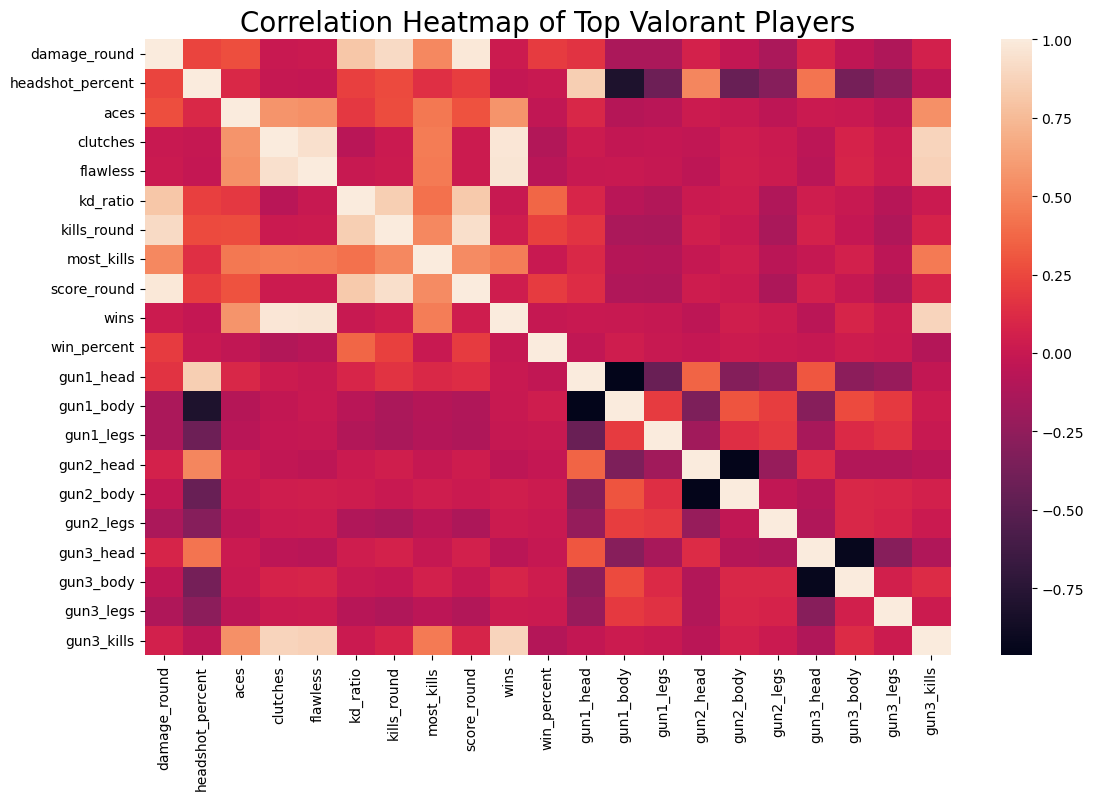

In [22]:
fig, ax = plt.subplots(figsize=(13, 8))
sns.heatmap(numeric_df.corr())
plt.title('Correlation Heatmap of Top Valorant Players', fontsize=20)
plt.show()

# Context: 
In Valorant, a players' weapon choice significantly impacts gameplay. Among the 17 different weapons, the top-three weapons, "Gun[1-3]", stand out as the most frequently used by players. (Gun 1 being the most-favored weapon of choice, Gun 3 being the 3rd most-favored)

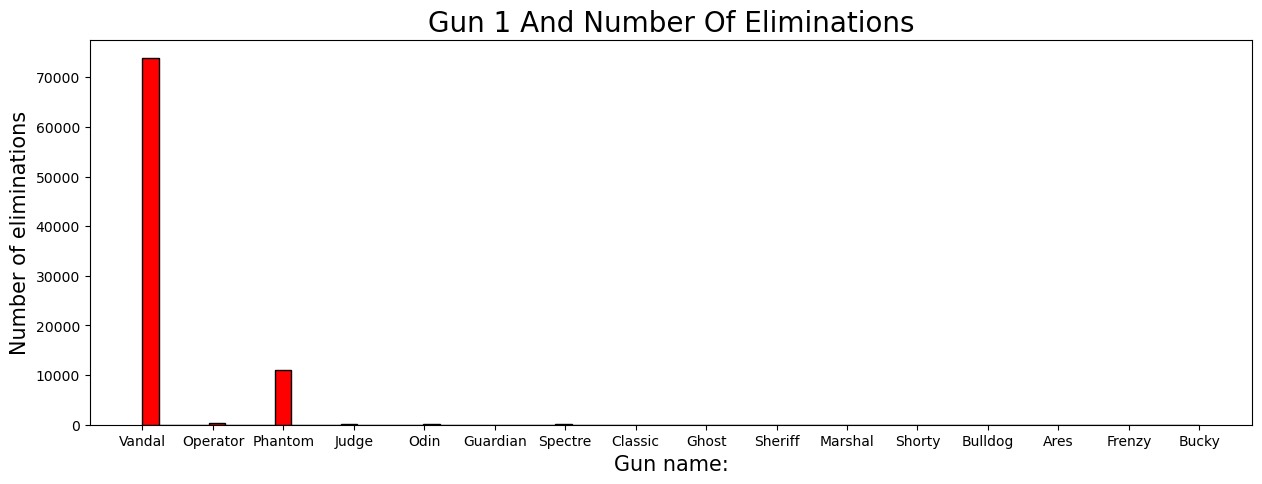

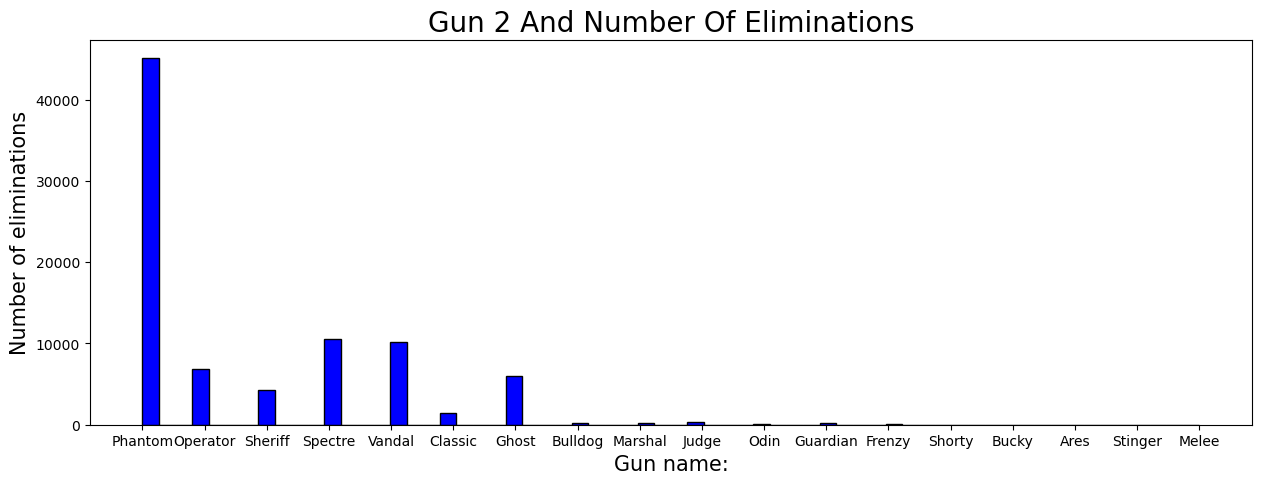

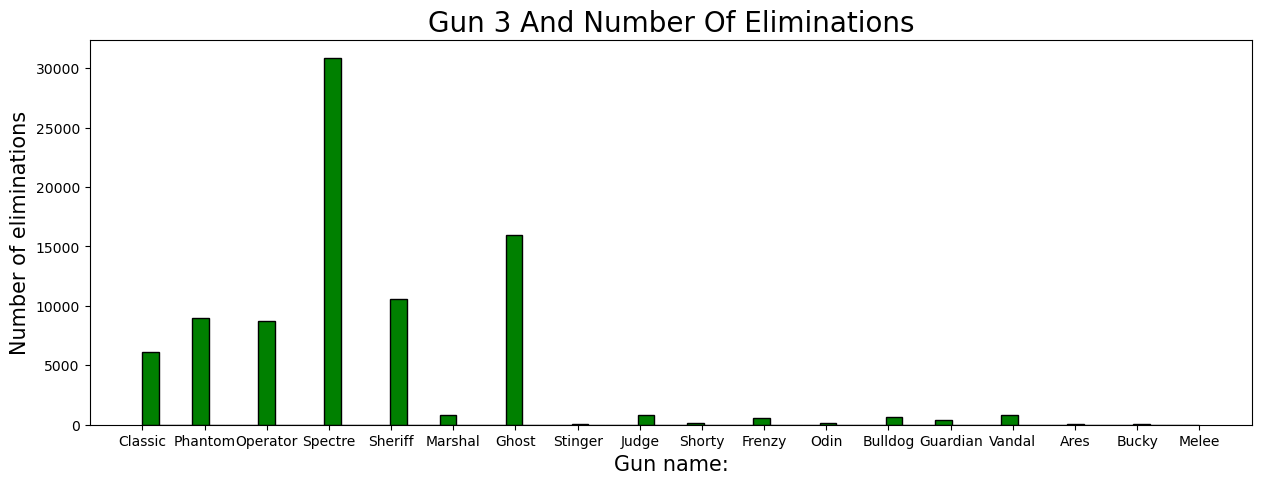

In [23]:
for i in range(1,4):
    colors = ["red","blue","green"]
    fig, ax = plt.subplots(figsize = (15,5))
    
    plt.hist(df["gun{}_name".format(i)], bins = 64, edgecolor="Black", facecolor = colors[i-1])
    plt.title("Gun {} and number of eliminations".format(i).title(),fontsize = 20)
    plt.xlabel("Gun name:",fontsize = 15)
    plt.ylabel("Number of eliminations",fontsize = 15)
    plt.show()

Shown by the histogram, the most preferred weapon is the "Vandal". Second most preferred is the "Phantom". Lastly, "Spectre" as the third.

# Linear Regression

Coefficient: 0.0077748624852823425
Intercept: -0.05643181253842333
R-squared: 0.6629070657865264


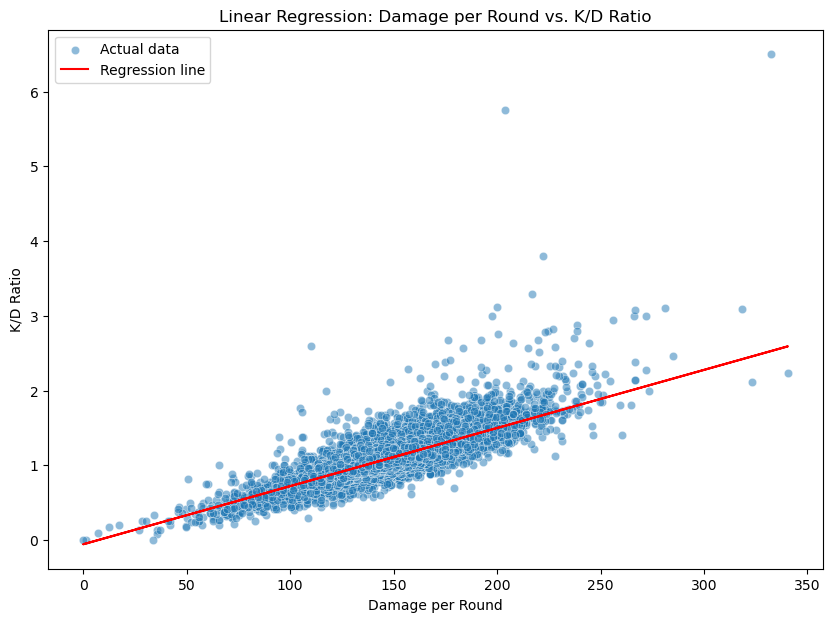

In [24]:
X = df[['damage_round']]
y = df['kd_ratio']

model = LinearRegression()
model.fit(X, y)
lm = model.predict(X)

print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
print(f"R-squared: {model.score(X, y)}")

plt.figure(figsize=(10, 7))
sns.scatterplot(x='damage_round', y='kd_ratio', data=numeric_df, alpha=0.5, label='Actual data')
plt.plot(df['damage_round'], lm, color='red', label='Regression line')
plt.xlabel('Damage per Round')
plt.ylabel('K/D Ratio')
plt.title('Linear Regression: Damage per Round vs. K/D Ratio')
plt.legend()
plt.show()

As shown through the linear regression model, these players' ability to consistently deal significant damage while maintaining a high kill/death ratio is indicative of their overall impact and importance within competitive play. Since kills and damage are highly correlated, it was inevitable that this was going to be a positive trend; however, when taking into account the amount of deaths, it is more interesting to see if there were any outliers among the top players.

# Logistic Regression
We will use logistic regression to predict whether a player is a "duelist" based on the average number of kills per round. Duelists are agents known to engage in direct combat and secure kills. Stereotypically, these are supposed to be the ones with the highest amount of kills.

In [25]:
duelist_agents = ['Jett', 'Phoenix', 'Raze', 'Reyna', 'Yoru', 'Neon']
df['isDuelist'] = df['agent_1'].isin(duelist_agents).astype(int)

# Train Test Split & Accuracy

In [26]:
X = df[['kills_round']]
y = df['isDuelist']      

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of logistic regression model:", accuracy)

Accuracy of logistic regression model: 0.6604729335418661


An accuracy score of 66% indicates that the model's ability to correctly classify agents as duelists or non-duelists based on average kills per round is slightly above average.

# Sigmoid Function
By mapping the output to a probability value between 0 and 1, the sigmoid function makes it possible to interpret the results of logistic regression. This graph should make it easier to predict the probability of being a duelists based on KPR

In [27]:
X_range = np.linspace(X['kills_round'].min(), X['kills_round'].max(), 300)
z = model.coef_ * X_range.reshape(-1,1) + model.intercept_ 
y_prob = 1 / (1 + np.exp(-z))

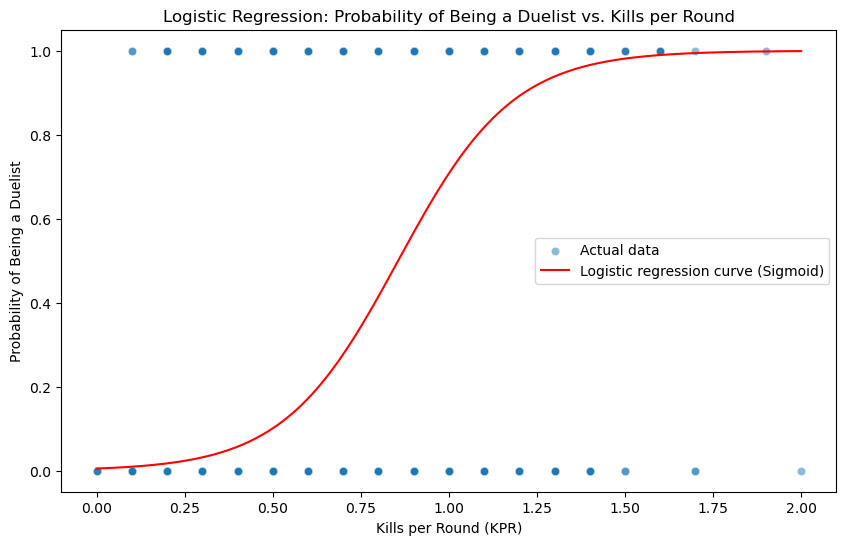

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='kills_round', y='isDuelist', data=df, alpha=0.5, label='Actual data')
plt.plot(X_range, y_prob, color='red', label='Logistic regression curve (Sigmoid)')
plt.xlabel('Kills per Round (KPR)')
plt.ylabel('Probability of Being a Duelist')
plt.title('Logistic Regression: Probability of Being a Duelist vs. Kills per Round')
plt.legend()
plt.show()

This logistic regression shows that having a high kill per round (KPR) does not necessarily mean that you are a duelist. While duelists are often associated with high kill counts, other roles also contribute significantly to team success through non-kill-related actions. However, in higher-ranked matches, we can see that it may be impossible to predict whether or not someone is playing a "duelist" solely based off KPR. Unfortunately, KPR is calculated to the nearest tenth so we will not get accurate depictions of where exactly is the mean KPR. On the other hand, it does not matter in this case since predicting the role of the character does not cause higher/lower KPR.

# Box Plot
Since KPR and the probability of being a duelist is not interesting enough, how about seeing it through the lens of all agents?

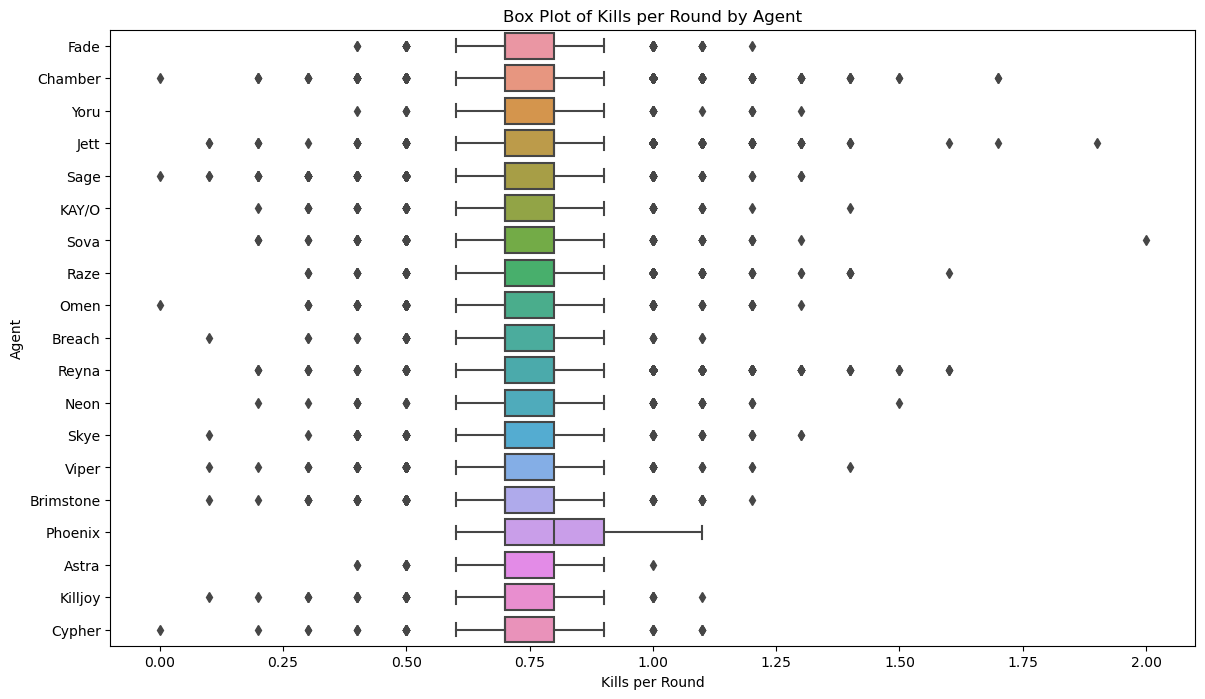

In [29]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='kills_round', y='agent_1', data=df)
plt.xlabel('Kills per Round')
plt.ylabel('Agent')
plt.title('Box Plot of Kills per Round by Agent')
plt.show()

Here we can see that the median of every agent is around 0.75 KPR, but what is interesting is the amount of disparity/outliers coming from each agent. Based on the many box plots, we can clearly see that our hypothesis was correct about agents not having the biggest effect on kills. 

# ElasticNet
ElasticNet is a linear model that combines the properties of both Lasso (L1) and Ridge (L2) regression.

In [30]:
X = df[['kills_round', 'damage_round', 'headshot_percent', 'score_round']]
y = df['win_percent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

Selecting these features might be irrelevant to the modeling process. However, since KPR and Score per Round (SPR) are highly correlated along with damage and headshot percentage, it might be useful since it can handle multicollinearity.

# Feature Scaling

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

With the combined property of both Lasso and Ridge regression, its important to address the regularization that comes with it. By scaling, it lets all features contribute equally so that one does not effect the other drastically.

In [32]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train_scaled, y_train)
y_pred = elastic_net.predict(X_test_scaled)

In [33]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("ElasticNet Coefficients:", elastic_net.coef_)
print("ElasticNet Intercept:", elastic_net.intercept_)
print("ElasticNet R-squared:", r2)
print("ElasticNet Mean Squared Error:", mse)

ElasticNet Coefficients: [ 2.18967798  0.33484552 -0.53189074  0.        ]
ElasticNet Intercept: 53.83205957188543
ElasticNet R-squared: 0.04880163146877592
ElasticNet Mean Squared Error: 125.29573107476482


With such a high MSE, it might be that the model has made an error in predicting the target variable. However, this would be the case since there are so many different factors to predicting win percentage. In a matchmaking system of 5v5 of the top players, even having one player not having the best day could throw this graph off and cause their own team to lose.

NameError: name 'intercept' is not defined

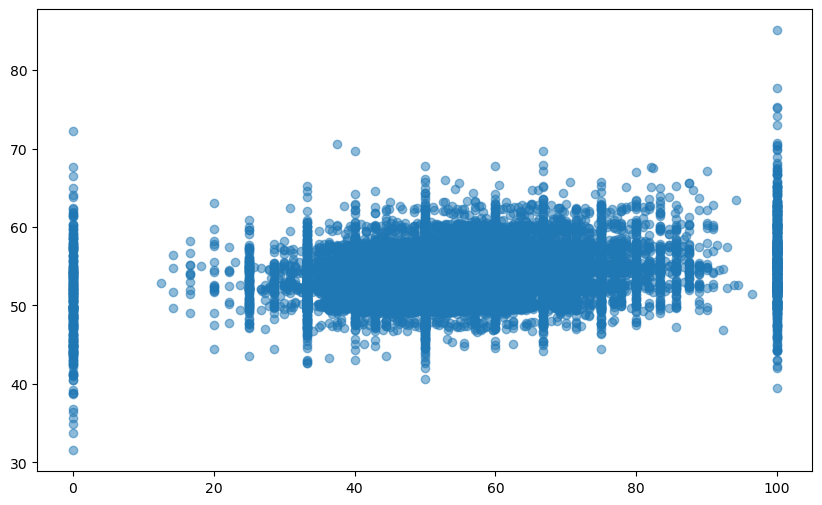

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [intercept + coefficients * y_test.min(), intercept + coefficients * y_test.max()],
         color='red', label='Regression Line')
plt.xlabel('Actual Win Percentage')
plt.ylabel('Predicted Win Percentage')
plt.title('ElasticNet Regression: Actual vs Predicted Win Percentage')
plt.show()

# Random Forest Regressor
Unlike ElasticNet producing coefficients, Random Forest fits a number of decision tree regressors on a number of samples that are averaged in order to improve the accuracy in predictions.

In [ ]:
rf = RandomForestRegressor(n_estimators=10, random_state=1)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

In [ ]:
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest R-squared:", r2_rf)
print("Random Forest Mean Squared Error:", mse_rf)

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5)
plt.xlabel('Actual Win Percentage')
plt.ylabel('Predicted Win Percentage')
plt.title('Random Forest Regression: Actual vs Predicted Win Percentage')
plt.show()

Overall, since there are not enough features, the regression techniques are not enough to accurately depict actual vs predicted win percentages. In this case, regularization should not be used since it discourages a more complex model in preventing overfitting.

# Summary

Overall, the analysis provides valuable insight into the Top Valorant Players dataset, helping to understand player behavior, performance factors, and the extremities of stereotypes. This analysis can inform strategies for improving player mindset while optimizing gameplay tactics in Valorant. What should be kept into mind is that win percentage in Valorant is shaped not only by individual gameplay statistics, but also by effective communication, teamwork tactics, etc.

# References
- https://www.kaggle.com/datasets/aliibrahim10/valorant-stats/data
- https://rayzhangzirui.github.io/math10sp24/notes/pandas.html
- https://rayzhangzirui.github.io/math10sp24/notes/visualization.html
- https://rayzhangzirui.github.io/math10sp24/notes/logistic_binary.html
- https://elitedatascience.com/algorithm-selection
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html